In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../데이터자료/이자보상배율최종.csv", encoding='cp949')
backtest_2011=pd.read_csv("../데이터자료/2011년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2012=pd.read_csv("../데이터자료/2012년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2013=pd.read_csv("../데이터자료/2013년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2014=pd.read_csv("../데이터자료/2014년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2015=pd.read_csv("../데이터자료/2015년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2016=pd.read_csv("../데이터자료/2016년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2017=pd.read_csv("../데이터자료/2017년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2018=pd.read_csv("../데이터자료/2018년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2019=pd.read_csv("../데이터자료/2019년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_2020=pd.read_csv("../데이터자료/2020년 주식데이터.csv", encoding='cp949',index_col=0)
backtest_kosdak=pd.read_csv("../데이터자료/코스닥주가.csv", encoding='cp949') 

In [3]:
for i in data.index:
    data.loc[i,"회계년도"]=data.loc[i,"회계년도"].replace('-12-', '-04-')
    data.loc[i,"상장일"]=data.loc[i,"상장일"].replace('-',"")
 
data.rename(columns={'회계년도':'투자일자'},inplace=True)
data

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.530000,2011,12,0
1,(주)CMG제약,58820,2012-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.750000,2012,12,0
2,(주)CMG제약,58820,2013-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.700000,2013,12,0
3,(주)CMG제약,58820,2014-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.600000,2014,12,0
4,(주)CMG제약,58820,2015-04-01,20010831,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.220000,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10648,흥구석유(주),24060,2016-04-01,19941207,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.660000,2016,12,0
10649,흥구석유(주),24060,2017-04-01,19941207,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.910000,2017,12,0
10650,흥구석유(주),24060,2018-04-01,19941207,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.660000,2018,12,0
10651,흥구석유(주),24060,2019-04-01,19941207,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.020000,2019,12,0


In [4]:
#logit 피처선정별 종류의 피처
data_mda = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]1주당순이익', '[제조]총자본투자효율','[제조]부가가치', '[제조]매출액순이익률', 
                 '[제조]자기자본배율', '[제조]총자본증가율','[제조]유형자산증가율',"[제조]유동비율",'[제조]비유동자산회전률','[제조]매입채무회전률' ]]
data_logit=data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]총자본증가율', '[제조]총자본사업이익률', '[제조]1주당매출액', 
                '[제조]비유동자산회전률', '[제조]매출채권회전률', '[제조]순운전자본회전률', '[제조]현금비율', '[제조]자기자본배율', '[제조]노동소득분배율','[제조]이자보상배율(이자비용)']]
data_lasso = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율','[제조]매출액순이익률',
                '[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_elastic = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]비유동자산증가율','[제조]자기자본증가율','[제조]재고자산증가율',
                     '[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]당좌자산회전률','[제조]현금비율','[제조]순운전자본비율','[제조]자기자본배율']]
data_same = data[['회사명', '거래소코드', '투자일자', '상장일', '상장폐지일', '산업명', '소속코드','[제조]노동소득분배율','[제조]자기자본배율','[제조]현금비율','[제조]자기자본증가율',
                  '[제조]총자본증가율','[제조]재고자산증가율','[제조]매출액순이익률','[제조]매입채무회전기간','[제조]재고자산회전기간','[제조]순운전자본회전률']]

In [5]:
# 투자 조건에 맞는 기업들을 오름차순 정렬
data_logit =data_logit.sort_values("[제조]순운전자본회전률", ascending=False)
data_logit

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
10645,흥구석유(주),24060,2013-04-01,19941207,NaN,도매 및 상품 중개업,5,-4.74,-0.28,16570.27,4.22,29.12,11.55,11.87,4314.71,66.30,-1.98
10644,흥구석유(주),24060,2012-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.14,1.01,18191.50,4.60,25.31,10.79,8.52,4282.74,56.34,4.66
10646,흥구석유(주),24060,2014-04-01,19941207,NaN,도매 및 상품 중개업,5,-2.83,1.75,12881.44,3.46,31.39,10.54,217.08,4411.09,52.78,64.35
10643,흥구석유(주),24060,2011-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.97,3.82,17427.11,4.37,24.77,9.70,10.82,4223.00,49.64,10.35
10647,흥구석유(주),24060,2015-04-01,19941207,NaN,도매 및 상품 중개업,5,12.89,0.79,10340.56,2.65,29.48,8.87,92.50,4548.48,42.79,8.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,(주)유틸렉스,263050,2019-04-01,20181224,NaN,의료용 물질 및 의약품 제조업,5,-10.64,-21.09,56.11,0.02,35.63,0.01,252.96,1720.07,0.00,-112.78
5502,(주)지노믹트리,228760,2019-04-01,20190327,NaN,의료용 물질 및 의약품 제조업,5,715.02,-4.27,14.09,0.02,6.96,0.00,2930.50,1089.95,0.00,-7.44
5504,(주)지놈앤컴퍼니,314130,2020-04-01,20201223,NaN,의료용 물질 및 의약품 제조업,5,243.56,-33.98,13.87,0.02,0.00,0.00,3456.01,1611.96,0.00,-21.54
10274,피씨엘(주),241820,2019-04-01,20170223,NaN,의료용 물질 및 의약품 제조업,5,48.25,-48.25,4.01,0.01,0.00,0.00,83.83,122.20,0.00,-64.69


In [6]:
# 년도별로 분류
data_logit_2011 = data_logit[data_logit["투자일자"]=='2011-04-01']
data_logit_2012 = data_logit[data_logit["투자일자"]=='2012-04-01']
data_logit_2012["투자일자"] = "2012-04-02"
data_logit_2013 = data_logit[data_logit["투자일자"]=='2013-04-01']
data_logit_2014 = data_logit[data_logit["투자일자"]=='2014-04-01']
data_logit_2015 = data_logit[data_logit["투자일자"]=='2015-04-01']
data_logit_2016 = data_logit[data_logit["투자일자"]=='2016-04-01']
data_logit_2017 = data_logit[data_logit["투자일자"]=='2017-04-01']
data_logit_2017["투자일자"] = "2017-04-03"
data_logit_2018 = data_logit[data_logit["투자일자"]=='2018-04-01']
data_logit_2018["투자일자"] = "2018-04-02"
data_logit_2019 = data_logit[data_logit["투자일자"]=='2019-04-01']
data_logit_2020 = data_logit[data_logit["투자일자"]=='2020-04-01']


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16592\1595854488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2012["투자일자"] = "2012-04-02"
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16592\1595854488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_logit_2017["투자일자"] = "2017-04-03"
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16592\1595854488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [7]:
data_logit_2011_buy=data_logit_2011[data_logit_2011["상장일"]<='20110401']
data_logit_2012_buy=data_logit_2012[data_logit_2012["상장일"]<='20120401']
data_logit_2013_buy=data_logit_2013[data_logit_2013["상장일"]<='20130401']
data_logit_2014_buy=data_logit_2014[data_logit_2014["상장일"]<='20140401']
data_logit_2015_buy=data_logit_2015[data_logit_2015["상장일"]<='20150401']
data_logit_2016_buy=data_logit_2016[data_logit_2016["상장일"]<='20160401']
data_logit_2017_buy=data_logit_2017[data_logit_2017["상장일"]<='20170401']
data_logit_2018_buy=data_logit_2018[data_logit_2018["상장일"]<='20180401']
data_logit_2019_buy=data_logit_2019[data_logit_2019["상장일"]<='20190401']
data_logit_2020_buy=data_logit_2020[data_logit_2020["상장일"]<='20200401']


In [8]:
# 해당기업 순위 20위 추출
data_logit_2011_buy=data_logit_2011_buy[:20]
data_logit_2012_buy=data_logit_2012_buy[:20]
data_logit_2013_buy=data_logit_2013_buy[:20]
data_logit_2014_buy=data_logit_2014_buy[:20]
data_logit_2015_buy=data_logit_2015_buy[:20]
data_logit_2016_buy=data_logit_2016_buy[:20]
data_logit_2017_buy=data_logit_2017_buy[:20]
data_logit_2018_buy=data_logit_2018_buy[:20]
data_logit_2019_buy=data_logit_2019_buy[:20]
data_logit_2020_buy=data_logit_2020_buy[:20]

In [9]:
#트레이드 조건 주기
data_logit_2011_buy["trade"]="buy"
data_logit_2012_buy["trade"]="buy"
data_logit_2013_buy["trade"]="buy"
data_logit_2014_buy["trade"]="buy"
data_logit_2015_buy["trade"]="buy"
data_logit_2016_buy["trade"]="buy"
data_logit_2017_buy["trade"]="buy"
data_logit_2018_buy["trade"]="buy"
data_logit_2019_buy["trade"]="buy"
data_logit_2020_buy["trade"]="buy"

In [10]:
data_logit_2011

,회사명,거래소코드,투자일자,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용)
10643,흥구석유(주),24060,2011-04-01,19941207,NaN,도매 및 상품 중개업,5,-1.97,3.82,17427.11,4.37,24.77,9.70,10.82,4223.00,49.64,10.35
7691,고려신용정보(주),49720,2011-04-01,20020131,NaN,사업지원 서비스업,5,8.19,17.56,5637.03,8.72,26.25,5.33,11.13,172.57,64.92,207.95
8043,도이치모터스(주),67990,2011-04-01,20041203,NaN,기타 기계 및 장비 제조업,5,65.91,5.74,17027.02,7.99,164.69,3.80,38.83,300.09,58.69,2.76
3515,(주)에이디칩스,54630,2011-04-01,20011113,NaN,도매 및 상품 중개업,6,9.78,3.89,7876.77,7.58,16.81,3.76,90.51,312.76,77.41,40.00
7067,(주)피씨디렉트,51380,2011-04-01,20020215,NaN,도매 및 상품 중개업,5,3.77,10.11,45991.02,78.60,22.53,3.59,59.12,883.04,54.95,39.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3759,(주)에피밸리,68630,2011-04-01,20051027,2012-04-24,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",4,-62.40,-25.68,842.89,0.12,0.00,0.11,1.00,0.00,0.00,-4493653.05
2763,(주)씨티앤티,50470,2011-04-01,20020423,2012-05-01,자동차 및 트레일러 제조업,4,-36.62,-29.61,308.76,0.16,0.83,0.10,1.63,29.93,0.00,-4493653.05
5266,(주)제넥신,95700,2011-04-01,20090915,NaN,연구개발업,5,5.75,-17.56,528.30,0.12,6.24,0.10,34.44,960.65,0.00,-28.26
4674,(주)유씨아이,38340,2011-04-01,20011122,NaN,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",6,-95.84,-0.03,3418.54,1.49,15.06,0.04,2.76,132.79,105.80,-0.38


In [11]:
stock_2011 = pd.merge(backtest_2011,data_logit_2011_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2012 = pd.merge(backtest_2012,data_logit_2012_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2013 = pd.merge(backtest_2013,data_logit_2013_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2014 = pd.merge(backtest_2014,data_logit_2014_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2015 = pd.merge(backtest_2015,data_logit_2015_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2016 = pd.merge(backtest_2016,data_logit_2016_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2017 = pd.merge(backtest_2017,data_logit_2017_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2018 = pd.merge(backtest_2018,data_logit_2018_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2019 = pd.merge(backtest_2019,data_logit_2019_buy, how='left',on=['회사명','투자일자','거래소코드'])
stock_2020 = pd.merge(backtest_2020,data_logit_2020_buy, how='left',on=['회사명','투자일자','거래소코드'])

In [12]:
stock_2011

,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
0,(주)CMG제약,58820,2011-04-01,1710,-0.001168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(주)CMG제약,58820,2011-04-04,1708,-0.001170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(주)CMG제약,58820,2011-04-05,1732,0.014052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(주)CMG제약,58820,2011-04-06,1732,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(주)CMG제약,58820,2011-04-07,1735,0.001732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232119,흥구석유(주),24060,2012-03-26,1745,0.002874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232120,흥구석유(주),24060,2012-03-27,1720,-0.014327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232121,흥구석유(주),24060,2012-03-28,1720,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232122,흥구석유(주),24060,2012-03-29,1735,0.008721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
list =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]
list_grn =[stock_2011,stock_2012,stock_2013,stock_2014,stock_2015,stock_2016,stock_2017,stock_2018,stock_2019,stock_2020]


In [14]:
for i in range(len(list)):
    for j in list[i].index:
        if j>0:
            if list[i].loc[j-1,"trade"] == "buy":
                list[i].loc[j,"trade"] = "hold"
            elif  list[i].loc[j-1,"trade"] == "hold":
                if list[i].iloc[:,1][j] == list[i].iloc[:,1][j-1]:
                    list[i].loc[j,"trade"] = "hold"
                elif list[i].iloc[:,1][j] != list[i].iloc[:,1][j-1]:
                    list[i].loc[j-1,"trade"] = "sell"
                if j== list[i].tail(n=1).index:
                    list[i].loc[j,"trade"] = "sell"
                        
for i in range(len(list)):
    list[i] = list[i][["회사명","거래소코드","투자일자","종가","일일수익률","trade"]]
    list[i] = list[i].dropna()
    list[i] = list[i].sort_values('투자일자', ascending=True)
    list[i] = list[i].reset_index(drop='index')
    list[i] = list[i].groupby("투자일자")["일일수익률"].sum()/20

In [15]:
# acc_rtn2= 1
# for i in range(len(list)):
#     list[i]=list[i].reset_index()
#     for j in list[i].index:
        
#         list[i].loc[j,"연누적수익률"] = acc_rtn2*list[i].loc[j,"일일수익률"]
#         acc_rtn2 = list[i].loc[j,"연누적수익률"]

In [16]:
stock_2011[stock_2011["trade"]=="sell"]

,회사명,거래소코드,투자일자,종가,일일수익률,상장일,상장폐지일,산업명,소속코드,[제조]총자본증가율,[제조]총자본사업이익률,[제조]1주당매출액,[제조]비유동자산회전률,[제조]매출채권회전률,[제조]순운전자본회전률,[제조]현금비율,[제조]자기자본배율,[제조]노동소득분배율,[제조]이자보상배율(이자비용),trade
44012,(주)서원인텍,93920,2012-03-30,5010,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
70139,(주)에스에이엠티,31330,2012-03-30,1167,-0.023431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
74821,(주)에이디칩스,54630,2012-03-30,1525,0.007931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
83124,(주)엘앤에프,66970,2012-03-30,8345,0.018926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
113145,(주)정상제이엘에스,40420,2012-03-30,5900,-0.005059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
141069,(주)토비스,51360,2012-03-30,6470,0.050325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
154131,(주)피씨디렉트,51380,2012-03-30,2253,0.015322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
155381,(주)피제이메탈,128660,2012-03-30,2055,-0.007246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
168018,고려신용정보(주),49720,2012-03-30,1050,-0.014085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell
169768,금강철강(주),53260,2012-03-30,2650,0.021195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell


In [17]:
#각 년도별 수익률 합치기
rtn =pd.concat(list)
rtn = pd.DataFrame(rtn)

In [18]:
#리밸런싱 날짜는 수익률 반영을 못하므로 제거
rtn["일일수익률"] =rtn["일일수익률"]*100
rtn =rtn.drop(index=["2011-04-01","2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
stock_rtn=rtn.reset_index()

In [19]:
stock_rtn=rtn.reset_index()
stock_rtn.columns=["투자일자","일일수익률(%)"]
stock_rtn["일일수익률"] =(stock_rtn["일일수익률(%)"]/100) +1
stock_rtn

,투자일자,일일수익률(%),일일수익률
0,2011-04-04,1.332847,1.013328
1,2011-04-05,0.807349,1.008073
2,2011-04-06,0.462580,1.004626
3,2011-04-07,0.821096,1.008211
4,2011-04-08,0.607259,1.006073
...,...,...,...
2448,2021-03-25,0.776937,1.007769
2449,2021-03-26,1.797766,1.017978
2450,2021-03-29,0.127336,1.001273
2451,2021-03-30,0.597174,1.005972


In [20]:
# stock_rtn[stock_rtn["투자일자"]=='2012-03-30']248
# stock_rtn[stock_rtn["투자일자"]=='2013-03-29'] 494
# stock_rtn[stock_rtn["투자일자"]=='2014-03-31'] 740
# stock_rtn[stock_rtn["투자일자"]=='2015-03-31'] 983
# stock_rtn[stock_rtn["투자일자"]=='2016-03-31'] 1230
# stock_rtn[stock_rtn["투자일자"]=='2017-03-31'] 1477
# stock_rtn[stock_rtn["투자일자"]=='2018-03-30'] 1718
# stock_rtn[stock_rtn["투자일자"]=='2019-03-29'] 1959
# stock_rtn[stock_rtn["투자일자"]=='2020-03-31'] 2207
# stock_rtn[stock_rtn["투자일자"]=='2021-03-31'] 2452


In [21]:
acc_rtn=1
for i in stock_rtn.index:
    
    stock_rtn.loc[i,"누적수익률"] = acc_rtn*stock_rtn.loc[i,"일일수익률"]
    acc_rtn = stock_rtn.loc[i,"누적수익률"]
        

acc_rtn_1 = 1
for i in stock_rtn.index:
    if i <= 248:
        
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_1*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_1 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 1
        
acc_rtn_2 = 1
for i in stock_rtn.index:
    if 248 < i <= 494:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_2*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_2 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 2
        
acc_rtn_3 = 1        
for i in stock_rtn.index:
    if  494< i <=740:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_3*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_3 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 3
        
acc_rtn_4 = 1       
for i in stock_rtn.index:
    if 740 < i <= 983:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_4*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_4 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 4
        
acc_rtn_5 = 1       
for i in stock_rtn.index:
    if  983< i <= 1230:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_5*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_5 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 5

acc_rtn_6 = 1
for i in stock_rtn.index:
    if 1230 < i <= 1477:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_6*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_6 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 6
        
acc_rtn_7 = 1
for i in stock_rtn.index:
    if 1477 < i <= 1718:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_7*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_7 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 7

acc_rtn_8 = 1
for i in stock_rtn.index:
    if 1718 < i <= 1959:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_8*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_8 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 8   
             
acc_rtn_9 = 1      
for i in stock_rtn.index:
    if 1959 < i <= 2207:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_9*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_9 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 9
        
acc_rtn_10 = 1       
for i in stock_rtn.index:
    if 2207 < i <= 2452:
        stock_rtn.loc[i,"연누적수익률"] = acc_rtn_10*stock_rtn.loc[i,"일일수익률"]
        acc_rtn_10 = stock_rtn.loc[i,"연누적수익률"]
        stock_rtn.loc[i,"투자연차"] = 10
    

In [22]:
#코스닥 시작 데이터 61
# backtest_kosdak[backtest_kosdak["날짜"]=="2011-04-04"]
#코스닥 마지막 데이터 2522
#backtest_kosdak[backtest_kosdak["날짜"]=="2021-03-31"]

In [23]:
#코스닥 데이터 끌고오기
backtest_kosdak_buy= backtest_kosdak[61:2523]
backtest_kosdak_rtn = backtest_kosdak_buy.set_index("날짜")

In [24]:
backtest_kosdak_rtn =backtest_kosdak_rtn.drop(index=["2012-04-02","2013-04-01","2014-04-01","2015-04-01","2016-04-01","2017-04-03","2018-04-02","2019-04-01","2020-04-01"])
backtest_kosdak_rtn=backtest_kosdak_rtn.reset_index()

In [25]:
backtest_kosdak_rtn.columns = ["투자일자","코스닥종가","시가총액","코스닥수익률","코스닥시총수익률"]

In [26]:
#주식수익률과 코스닥 merge
stock_rtn_all = pd.merge(stock_rtn,backtest_kosdak_rtn,how="left",on="투자일자")


In [27]:
stock_rtn_all["코스닥수익률"]=stock_rtn_all["코스닥수익률"]*100


In [28]:
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률
0,2011-04-04,1.332847,1.013328,1.013328,1.013328,1.0,534.90,105835314871792,0.533774,0.005763
1,2011-04-05,0.807349,1.008073,1.021510,1.021510,1.0,537.66,106138352312272,0.515984,0.002863
2,2011-04-06,0.462580,1.004626,1.026235,1.026235,1.0,533.98,105387016008919,-0.684447,-0.007079
3,2011-04-07,0.821096,1.008211,1.034661,1.034661,1.0,534.97,105571037939827,0.185400,0.001746
4,2011-04-08,0.607259,1.006073,1.040944,1.040944,1.0,534.20,105439281631189,-0.143933,-0.001248
...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.776937,1.007769,7.106050,2.051652,10.0,954.99,387311921085308,0.122665,0.001147
2449,2021-03-26,1.797766,1.017978,7.233800,2.088536,10.0,956.70,388051677647507,0.179059,0.001910
2450,2021-03-29,0.127336,1.001273,7.243011,2.091196,10.0,954.10,386977420485060,-0.271768,-0.002768
2451,2021-03-30,0.597174,1.005972,7.286264,2.103684,10.0,958.06,388660278311558,0.415051,0.004349


In [29]:

stock_rtn_all["코스닥수익률(%)"]= stock_rtn_all["코스닥수익률"]
stock_rtn_all["코스닥일일수익률"] =(stock_rtn_all["코스닥수익률(%)"]/100) +1
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률
0,2011-04-04,1.332847,1.013328,1.013328,1.013328,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338
1,2011-04-05,0.807349,1.008073,1.021510,1.021510,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160
2,2011-04-06,0.462580,1.004626,1.026235,1.026235,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156
3,2011-04-07,0.821096,1.008211,1.034661,1.034661,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854
4,2011-04-08,0.607259,1.006073,1.040944,1.040944,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561
...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.776937,1.007769,7.106050,2.051652,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227
2449,2021-03-26,1.797766,1.017978,7.233800,2.088536,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791
2450,2021-03-29,0.127336,1.001273,7.243011,2.091196,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282
2451,2021-03-30,0.597174,1.005972,7.286264,2.103684,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151


In [30]:
acc_rtn=1
for i in stock_rtn_all.index:
    
    stock_rtn_all.loc[i,'코스닥누적수익률'] = acc_rtn*stock_rtn_all.loc[i,"코스닥일일수익률"]
    acc_rtn = stock_rtn_all.loc[i,"코스닥누적수익률"]
    
    
stock_rtn_all

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률
0,2011-04-04,1.332847,1.013328,1.013328,1.013328,1.0,534.90,105835314871792,0.533774,0.005763,0.533774,1.005338,1.005338
1,2011-04-05,0.807349,1.008073,1.021510,1.021510,1.0,537.66,106138352312272,0.515984,0.002863,0.515984,1.005160,1.010525
2,2011-04-06,0.462580,1.004626,1.026235,1.026235,1.0,533.98,105387016008919,-0.684447,-0.007079,-0.684447,0.993156,1.003609
3,2011-04-07,0.821096,1.008211,1.034661,1.034661,1.0,534.97,105571037939827,0.185400,0.001746,0.185400,1.001854,1.005469
4,2011-04-08,0.607259,1.006073,1.040944,1.040944,1.0,534.20,105439281631189,-0.143933,-0.001248,-0.143933,0.998561,1.004022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.776937,1.007769,7.106050,2.051652,10.0,954.99,387311921085308,0.122665,0.001147,0.122665,1.001227,1.777700
2449,2021-03-26,1.797766,1.017978,7.233800,2.088536,10.0,956.70,388051677647507,0.179059,0.001910,0.179059,1.001791,1.780883
2450,2021-03-29,0.127336,1.001273,7.243011,2.091196,10.0,954.10,386977420485060,-0.271768,-0.002768,-0.271768,0.997282,1.776043
2451,2021-03-30,0.597174,1.005972,7.286264,2.103684,10.0,958.06,388660278311558,0.415051,0.004349,0.415051,1.004151,1.783415


In [31]:

for i in stock_rtn_all.index:
    if stock_rtn_all.iloc[:,5][i] == 1:
        stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥누적수익률"]
        
    elif stock_rtn_all.iloc[:,5][i] != 1:
        if stock_rtn_all.iloc[:,5][i] == stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i-1,"코스닥연누적수익률"]*stock_rtn_all.loc[i,"코스닥일일수익률"]
            
        elif stock_rtn_all.iloc[:,5][i] != stock_rtn_all.iloc[:,5][i-1]:
            stock_rtn_all.loc[i,"코스닥연누적수익률"] = stock_rtn_all.loc[i,"코스닥일일수익률"]
            
                

    

In [32]:
stock_rtn_all.iloc[:,5]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
2448    10.0
2449    10.0
2450    10.0
2451    10.0
2452    10.0
Name: 투자연차, Length: 2453, dtype: float64

In [33]:
stock_rtn_all[490:505]

,투자일자,일일수익률(%),일일수익률,누적수익률,연누적수익률,투자연차,코스닥종가,시가총액,코스닥수익률,코스닥시총수익률,코스닥수익률(%),코스닥일일수익률,코스닥누적수익률,코스닥연누적수익률
490,2013-03-25,1.238911,1.012389,1.212116,1.090821,2.0,549.56,122836307769308,-0.306576,-0.002275,-0.306576,0.996934,1.028457,1.053200
491,2013-03-26,1.069870,1.010699,1.225084,1.102491,2.0,549.90,122920014052292,0.061868,0.000681,0.061868,1.000619,1.029093,1.053852
492,2013-03-27,1.116129,1.011161,1.238758,1.114796,2.0,548.72,122659767622917,-0.214584,-0.002117,-0.214584,0.997854,1.026885,1.051591
493,2013-03-28,1.185039,1.011850,1.253438,1.128007,2.0,552.64,123537571806713,0.714390,0.007156,0.714390,1.007144,1.034221,1.059103
494,2013-03-29,-0.296332,0.997037,1.249723,1.124664,2.0,555.02,124020587600936,0.430660,0.003910,0.430660,1.004307,1.038675,1.063664
495,2013-04-02,1.206146,1.012061,1.264797,1.012061,3.0,552.83,123545583208574,-0.205787,-0.002124,-0.205787,0.997942,1.036537,0.997942
496,2013-04-03,0.068157,1.000682,1.265659,1.012751,3.0,557.96,124727364942628,0.927953,0.009566,0.927953,1.009280,1.046156,1.007203
497,2013-04-04,-1.361230,0.986388,1.248430,0.998965,3.0,555.23,124124104831224,-0.489282,-0.004837,-0.489282,0.995107,1.041037,1.002274
498,2013-04-05,-1.771771,0.982282,1.226311,0.981266,3.0,547.51,122387758967786,-1.390415,-0.013989,-1.390415,0.986096,1.026563,0.988339
499,2013-04-08,-2.839500,0.971605,1.191490,0.953403,3.0,528.78,118098161236530,-3.420942,-0.035049,-3.420942,0.965791,0.991445,0.954528


In [34]:
stock_rtn_all["코스닥연누적수익률(%)"]=(stock_rtn_all["코스닥연누적수익률"]-1)*100
stock_rtn_all["누적수익률(%)"]= (stock_rtn_all["누적수익률"]-1)*100
stock_rtn_all["코스닥누적수익률(%)"]= (stock_rtn_all["코스닥누적수익률"]-1)*100
stock_rtn_all["연누적수익률(%)"]= (stock_rtn_all["연누적수익률"]-1)*100


In [35]:
stock_rtn_all =stock_rtn_all[['투자일자', '일일수익률(%)',"누적수익률(%)","연누적수익률(%)", '코스닥종가', '코스닥수익률(%)', '코스닥누적수익률(%)',"코스닥연누적수익률(%)",'투자연차']]


In [36]:
stock_rtn_all

,투자일자,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
0,2011-04-04,1.332847,1.332847,1.332847,534.90,0.533774,0.533774,0.533774,1.0
1,2011-04-05,0.807349,2.150956,2.150956,537.66,0.515984,1.052513,1.052513,1.0
2,2011-04-06,0.462580,2.623486,2.623486,533.98,-0.684447,0.360862,0.360862,1.0
3,2011-04-07,0.821096,3.466124,3.466124,534.97,0.185400,0.546931,0.546931,1.0
4,2011-04-08,0.607259,4.094431,4.094431,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...,...
2448,2021-03-25,0.776937,610.604954,105.165250,954.99,0.122665,77.769983,73.055596,10.0
2449,2021-03-26,1.797766,623.379967,108.853641,956.70,0.179059,78.088297,73.365468,10.0
2450,2021-03-29,0.127336,624.301087,109.119586,954.10,-0.271768,77.604311,72.894317,10.0
2451,2021-03-30,0.597174,628.626424,110.368393,958.06,0.415051,78.341459,73.611916,10.0


In [37]:
# 전략누적수익률의 표준편차를 계산한다
Std = (stock_rtn_all["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( stock_rtn_all["일일수익률(%)"] - stock_rtn_all["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print( 'Sharpe ratio: %.2f' % Sharpe )

Sharpe ratio: 0.04


In [38]:
Sharpe *np.sqrt(252)

0.6602583390127762

In [39]:
Std

1.4151422270495118

In [40]:
#mdd 
((100+stock_rtn_all["누적수익률(%)"].min())-(100+stock_rtn_all["누적수익률(%)"].max()))/(stock_rtn_all["누적수익률(%)"].max()+100)

-0.8940895959793855

In [41]:
cagr = (stock_rtn_all
        ["누적수익률(%)"]**(1/10))-1
print(cagr*100)



0        2.914843
1        7.960068
2       10.125496
3       13.235971
4       15.138179
          ...    
2448    89.922331
2449    90.315993
2450    90.344095
2451    90.475562
2452    90.853536
Name: 누적수익률(%), Length: 2453, dtype: float64


In [42]:
stock_rtn_all=stock_rtn_all.set_index('투자일자')

In [43]:
rtn_2011 = stock_rtn_all[stock_rtn_all["투자연차"]==1]
rtn_2012 = stock_rtn_all[stock_rtn_all["투자연차"]==2]
rtn_2013 = stock_rtn_all[stock_rtn_all["투자연차"]==3]
rtn_2014 = stock_rtn_all[stock_rtn_all["투자연차"]==4]
rtn_2015 = stock_rtn_all[stock_rtn_all["투자연차"]==5]
rtn_2016 = stock_rtn_all[stock_rtn_all["투자연차"]==6]
rtn_2017 = stock_rtn_all[stock_rtn_all["투자연차"]==7]
rtn_2018 = stock_rtn_all[stock_rtn_all["투자연차"]==8]
rtn_2019 = stock_rtn_all[stock_rtn_all["투자연차"]==9]
rtn_2020 = stock_rtn_all[stock_rtn_all["투자연차"]==10]

In [44]:
rtn_2011

,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.332847,1.332847,1.332847,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.807349,2.150956,2.150956,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.462580,2.623486,2.623486,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.821096,3.466124,3.466124,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.607259,4.094431,4.094431,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.562341,10.510963,10.510963,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.345555,10.129087,10.129087,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.220370,9.886395,9.886395,519.56,-0.417833,-2.349359,-2.349359,1.0


In [48]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2011["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2011["일일수익률(%)"] - rtn_2011["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2011["누적수익률(%)"].min())-(100+rtn_2011["누적수익률(%)"].max()))/(rtn_2011["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2011

-0.317952089616142
1.605171194557114
Sharpe ratio: 0.03
0.4901820350941521


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2011-04-04,1.332847,1.332847,1.332847,534.90,0.533774,0.533774,0.533774,1.0
2011-04-05,0.807349,2.150956,2.150956,537.66,0.515984,1.052513,1.052513,1.0
2011-04-06,0.462580,2.623486,2.623486,533.98,-0.684447,0.360862,0.360862,1.0
2011-04-07,0.821096,3.466124,3.466124,534.97,0.185400,0.546931,0.546931,1.0
2011-04-08,0.607259,4.094431,4.094431,534.20,-0.143933,0.402210,0.402210,1.0
...,...,...,...,...,...,...,...,...
2012-03-26,-0.562341,10.510963,10.510963,523.39,-0.773504,-1.629515,-1.629515,1.0
2012-03-27,-0.345555,10.129087,10.129087,521.74,-0.315252,-1.939631,-1.939631,1.0
2012-03-28,-0.220370,9.886395,9.886395,519.56,-0.417833,-2.349359,-2.349359,1.0


c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tlsdm\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:15

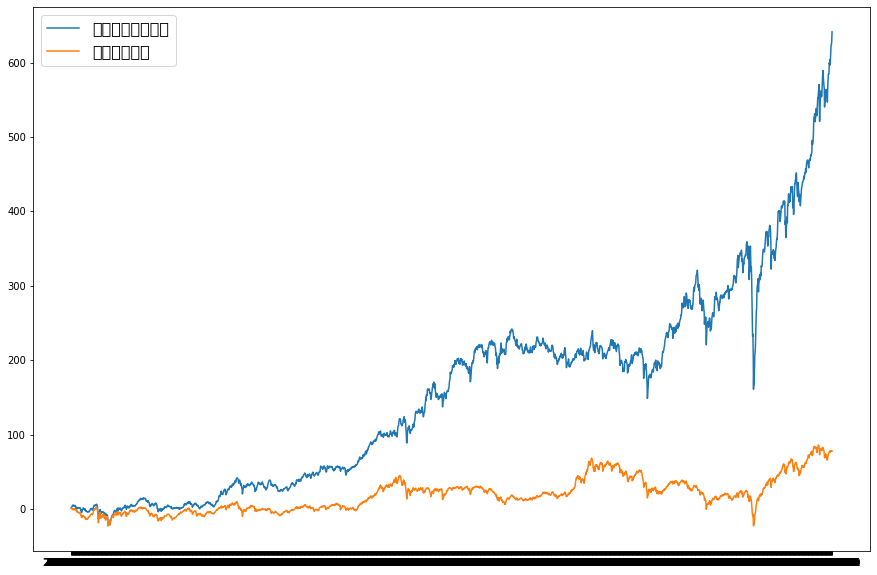

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(stock_rtn_all["누적수익률(%)"],label='포트폴리오수익률')
plt.plot(stock_rtn_all["코스닥누적수익률(%)"],label="코스닥수익률")
plt.legend(fontsize=16)

plt.show()

In [49]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2012["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2012["일일수익률(%)"] - rtn_2012["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2012["누적수익률(%)"].min())-(100+rtn_2012["누적수익률(%)"].max()))/(rtn_2012["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2012

-0.23107582597125093
1.0173406513575778
Sharpe ratio: 0.02
0.3478413651357614


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2012-04-03,-1.025990,9.979586,-1.025990,515.83,-1.144117,-3.466596,-1.144117,2.0
2012-04-04,-0.981443,8.900199,-1.997363,502.97,-2.493069,-5.873241,-3.608662,2.0
2012-04-05,-0.157570,8.728605,-2.151786,503.34,0.073563,-5.803998,-3.537754,2.0
2012-04-06,-0.238399,8.469397,-2.385055,503.41,0.013907,-5.790899,-3.524339,2.0
2012-04-09,-3.645295,4.515368,-5.943408,486.80,-3.299497,-8.899325,-6.707551,2.0
...,...,...,...,...,...,...,...,...
2013-03-25,1.238911,21.211624,9.082066,549.56,-0.306576,2.845700,5.320046,2.0
2013-03-26,1.069870,22.508430,10.249102,549.90,0.061868,2.909328,5.385205,2.0
2013-03-27,1.116129,23.875782,11.479624,548.72,-0.214584,2.688501,5.159065,2.0


In [50]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2013["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2013["일일수익률(%)"] - rtn_2013["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2013["누적수익률(%)"].min())-(100+rtn_2013["누적수익률(%)"].max()))/(rtn_2013["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2013

-0.15934727755085165
1.1112520824785066
Sharpe ratio: 0.04
0.7103164637450492


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2013-04-02,1.206146,26.479673,1.206146,552.83,-0.205787,3.653749,-0.205787,3.0
2013-04-03,0.068157,26.565878,1.275124,557.96,0.927953,4.615606,0.720256,3.0
2013-04-04,-1.361230,24.843025,-0.103463,555.23,-0.489282,4.103740,0.227449,3.0
2013-04-05,-1.771771,22.631092,-1.873401,547.51,-1.390415,2.656267,-1.166128,3.0
2013-04-08,-2.839500,19.148983,-4.659705,528.78,-3.420942,-0.855545,-4.547178,3.0
...,...,...,...,...,...,...,...,...
2014-03-25,-1.217028,37.483413,10.011087,539.05,-1.200513,1.070045,-2.693287,3.0
2014-03-26,0.580886,38.282035,10.650126,544.13,0.942399,2.022528,-1.776269,3.0
2014-03-27,-0.293360,37.876371,10.325522,541.46,-0.490692,1.521912,-2.258245,3.0


In [51]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2014["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2014["일일수익률(%)"] - rtn_2014["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2014["누적수익률(%)"].min())-(100+rtn_2014["누적수익률(%)"].max()))/(rtn_2014["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2014

-0.27594131231947217
0.896477690179696
Sharpe ratio: 0.08
1.2735333199842997


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2014-04-02,2.017520,40.593749,2.017520,557.65,1.560793,3.129309,1.560793,4.0
2014-04-03,0.177879,40.843835,2.198988,557.01,-0.114767,3.010951,1.444234,4.0
2014-04-04,1.012001,42.269176,3.233242,560.44,0.615788,3.645280,2.068915,4.0
2014-04-07,0.268921,42.651768,3.510858,554.23,-1.108058,2.496830,0.937933,4.0
2014-04-08,-0.416940,42.056996,3.079280,554.07,-0.028869,2.467240,0.908793,4.0
...,...,...,...,...,...,...,...,...
2015-03-25,0.387058,93.008319,40.050537,651.05,1.430196,20.402290,18.571064,4.0
2015-03-26,-0.680810,91.694299,39.097059,642.53,-1.308655,18.826639,17.019378,4.0
2015-03-27,-0.375656,90.974187,38.574532,640.12,-0.375080,18.380944,16.580462,4.0


In [52]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2015["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2015["일일수익률(%)"] - rtn_2015["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2015["누적수익률(%)"].min())-(100+rtn_2015["누적수익률(%)"].max()))/(rtn_2015["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2015

-0.3547900084107304
1.3721144754289825
Sharpe ratio: 0.10
1.6130897514667253


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2015-04-02,-0.597658,93.014022,-0.597658,650.57,0.052289,20.361629,0.052289,5.0
2015-04-03,1.296775,95.516980,0.691367,658.04,1.148224,21.743650,1.201113,5.0
2015-04-06,0.749347,96.982080,1.445895,662.15,0.624582,22.504039,1.833197,5.0
2015-04-07,0.659722,98.281615,2.115156,666.83,0.706788,23.369883,2.552943,5.0
2015-04-08,0.686819,99.643450,2.816502,668.03,0.179956,23.591895,2.737493,5.0
...,...,...,...,...,...,...,...,...
2016-03-25,0.194137,183.651890,46.080901,683.20,-0.445895,26.398489,5.070514,5.0
2016-03-28,0.899887,186.204437,47.395464,676.51,-0.979215,25.160775,4.041647,5.0
2016-03-29,0.261031,186.951518,47.780212,686.50,1.476697,27.009020,5.578026,5.0


In [53]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2016["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2016["일일수익률(%)"] - rtn_2016["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2016["누적수익률(%)"].min())-(100+rtn_2016["누적수익률(%)"].max()))/(rtn_2016["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2016

-0.2074729741705747
1.1731565182716346
Sharpe ratio: 0.06
1.0096947374240064


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2016-04-04,0.664579,192.502130,0.664579,696.98,0.910684,28.516656,0.910684,6.0
2016-04-05,-0.380816,191.388235,0.281232,695.70,-0.183649,28.280636,0.725362,6.0
2016-04-06,1.008920,194.328109,1.292989,694.03,-0.240046,27.972703,0.483574,6.0
2016-04-07,-1.151045,190.940261,0.127062,697.13,0.446667,28.544315,0.932401,6.0
2016-04-08,0.748117,193.116836,0.876130,697.10,-0.004303,28.538783,0.928057,6.0
...,...,...,...,...,...,...,...,...
2017-03-27,0.629685,213.246330,7.803693,607.07,-0.182512,11.938085,-12.106734,6.0
2017-03-28,-1.076896,209.872991,6.642759,612.28,0.858221,12.898760,-11.352416,6.0
2017-03-29,0.944039,212.798313,7.649508,613.63,0.220487,13.147688,-11.156959,6.0


In [54]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2017["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2017["일일수익률(%)"] - rtn_2017["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2017["누적수익률(%)"].min())-(100+rtn_2017["누적수익률(%)"].max()))/(rtn_2017["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2017

-0.14618089761251132
1.0000773631357576
Sharpe ratio: -0.14
-2.2329006362733925


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2017-04-04,-0.516643,209.695861,-0.516643,625.49,-0.482085,13.639005,-0.482085,7.0
2017-04-05,1.897262,215.571602,1.370817,630.17,0.748213,14.489268,0.262521,7.0
2017-04-06,0.518887,217.209062,1.896816,630.46,0.046019,14.541955,0.308662,7.0
2017-04-07,0.187651,217.804307,2.088026,633.32,0.453637,15.061560,0.763699,7.0
2017-04-10,-2.029499,211.354472,0.016151,619.41,-2.196362,12.534391,-1.449437,7.0
...,...,...,...,...,...,...,...,...
2018-03-26,1.515133,206.337383,-1.595484,853.69,2.893887,55.098375,35.825431,7.0
2018-03-27,0.515230,207.915725,-1.088475,858.84,0.603263,56.034027,36.644816,7.0
2018-03-28,-0.910011,205.113659,-1.988580,850.97,-0.916352,54.604205,35.392668,7.0


In [55]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2018["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2018["일일수익률(%)"] - rtn_2018["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2018["누적수익률(%)"].min())-(100+rtn_2018["누적수익률(%)"].max()))/(rtn_2018["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2018

-0.2892467829932987
1.3949217056367211
Sharpe ratio: 0.08
1.3411815516148897


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2018-04-03,-0.226149,208.763385,-0.226149,872.32,0.520857,59.083913,0.520857,8.0
2018-04-04,-1.394391,204.458017,-1.617387,862.51,-1.124587,57.294876,-0.609587,8.0
2018-04-05,0.709919,206.619422,-0.918950,868.93,0.744339,58.465683,0.130214,8.0
2018-04-06,-0.656253,204.607221,-1.569173,867.96,-0.111632,58.288785,0.018437,8.0
2018-04-09,-0.594439,202.796516,-2.154284,874.44,0.746578,59.470535,0.765153,8.0
...,...,...,...,...,...,...,...,...
2019-03-25,-1.649791,242.832200,10.782853,727.21,-2.252779,32.620383,-16.200737,8.0
2019-03-26,2.003081,249.699408,13.001924,736.81,1.320114,34.371123,-15.094492,8.0
2019-03-27,-0.758987,247.045233,12.144253,728.45,-1.134621,32.846520,-16.057847,8.0


In [56]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2019["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2019["일일수익률(%)"] - rtn_2019["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2019["누적수익률(%)"].min())-(100+rtn_2019["누적수익률(%)"].max()))/(rtn_2019["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2019

-0.43161476518302266
2.357205339148404
Sharpe ratio: 0.05
0.7593270964083578


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2019-04-02,1.029797,249.239134,1.029797,739.57,0.374588,33.501572,0.374588,9.0
2019-04-03,0.810289,252.068979,1.848430,749.30,1.315629,35.257957,1.695145,9.0
2019-04-04,0.415494,253.531804,2.271604,751.58,0.304284,35.669526,2.004587,9.0
2019-04-05,0.386010,254.896471,2.666382,751.71,0.017297,35.692992,2.022231,9.0
2019-04-08,0.097415,255.242192,2.766394,751.92,0.027936,35.730900,2.050732,9.0
...,...,...,...,...,...,...,...,...
2020-03-25,5.721073,205.024988,-11.760712,505.68,5.262281,-8.718479,-31.369010,9.0
2020-03-26,2.092927,211.408938,-9.913928,516.61,2.161446,-6.745478,-29.885588,9.0
2020-03-27,1.550294,216.236694,-8.517329,522.83,1.204003,-5.622691,-29.041408,9.0


In [57]:
# 전략누적수익률의 표준편차를 계산한다
Std = (rtn_2020["일일수익률(%)"]).std( )

# 전략의 샤프비율을 구하고 출력한다
Sharpe = ( rtn_2020["일일수익률(%)"] - rtn_2020["코스닥수익률(%)"] )/Std
Sharpe =Sharpe.mean()
print(((100+rtn_2020["누적수익률(%)"].min())-(100+rtn_2020["누적수익률(%)"].max()))/(rtn_2020["누적수익률(%)"].max()+100))
print(Std)
print( 'Sharpe ratio: %.2f' % Sharpe )
print(Sharpe *np.sqrt(252))
rtn_2020


-0.50732279775048
1.5927005452139784
Sharpe ratio: 0.06
0.8752473814538682


,일일수익률(%),누적수익률(%),연누적수익률(%),코스닥종가,코스닥수익률(%),코스닥누적수익률(%),코스닥연누적수익률(%),투자연차
투자일자,,,,,,,,
2020-04-02,5.434050,265.178596,5.434050,567.70,2.874021,5.676519,2.874021,10.0
2020-04-03,1.139859,269.341119,6.635850,573.01,0.935353,6.664968,3.836257,10.0
2020-04-06,5.777860,290.681133,12.797120,597.21,4.223312,11.169762,8.221586,10.0
2020-04-07,2.312199,299.714458,15.405214,606.90,1.622545,12.973542,9.977530,10.0
2020-04-08,0.245041,300.693924,15.688004,607.37,0.077443,13.061031,10.062699,10.0
...,...,...,...,...,...,...,...,...
2021-03-25,0.776937,610.604954,105.165250,954.99,0.122665,77.769983,73.055596,10.0
2021-03-26,1.797766,623.379967,108.853641,956.70,0.179059,78.088297,73.365468,10.0
2021-03-29,0.127336,624.301087,109.119586,954.10,-0.271768,77.604311,72.894317,10.0


In [46]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(100,200)})

fig, axes = plt.subplots(5,2)
# sns.lineplot(x=rtn_2011['투자일자'],y='수익률',data=rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[0,0].plot(rtn_2011[["연누적수익률(%)","코스닥연누적수익률(%)"]])

axes[0,1].plot(rtn_2012[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,0].plot(rtn_2013[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[1,1].plot(rtn_2014[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,0].plot(rtn_2015[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[2,1].plot(rtn_2016[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,0].plot(rtn_2017[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[3,1].plot(rtn_2018[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,0].plot(rtn_2019[["연누적수익률(%)","코스닥연누적수익률(%)"]])
axes[4,1].plot(rtn_2020[["연누적수익률(%)","코스닥연누적수익률(%)"]])